In [7]:
%reload_ext autoreload
%autoreload 2

from ripple_heterogeneity.utils import functions,loading
from ripple_heterogeneity.ripple import pairwise_ccg_deep_sup_theta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from statannotations.Annotator import Annotator
from matplotlib.ticker import AutoMinorLocator
from scipy.ndimage import gaussian_filter1d
from scipy import stats
import nelpy as nel
from bycycle.features import compute_features
from bycycle.plts import plot_burst_detect_summary, plot_cyclepoints_array

functions.set_plotting_defaults()
%config InlineBackend.figure_format = 'retina'
fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'

In [2]:
basepath = r"Z:/Data/HMC1/day10"
lfp = loading.LoadLfp(basepath,257)

In [3]:
lfp.lfp

<AnalogSignalArray at 0x21b8e9fc730: 1 signals> for a total of 6:13:22:392 hours

In [14]:
f_theta = (4, 10)
threshold_kwargs = {'amp_fraction_threshold': .3,
                    'amp_consistency_threshold': .4,
                    'period_consistency_threshold': .5,
                    'monotonicity_threshold': .5,
                    'min_n_cycles': 3}
df_features = compute_features(lfp.lfp.data[0], lfp.lfp.fs, f_theta,threshold_kwargs=threshold_kwargs)
df_features

,amp_fraction,amp_consistency,period_consistency,monotonicity,period,time_peak,time_trough,volt_peak,volt_trough,time_decay,...,time_rdsym,time_ptsym,band_amp,sample_peak,sample_last_zerox_decay,sample_zerox_decay,sample_zerox_rise,sample_last_trough,sample_next_trough,is_burst
0,0.600873,NaN,NaN,0.613292,199,79,61,2552.0,-564.0,141,...,0.291457,0.564286,653.974610,152,57,197,118,94,293,False
1,0.948012,0.586521,0.904523,0.645291,180,98,148,4638.0,-1491.0,113,...,0.372222,0.398374,1731.687135,360,197,443,345,293,473,True
2,0.770101,0.563067,0.841026,0.721065,164,122,54,2325.0,-956.0,105,...,0.359756,0.693182,1578.435559,532,443,619,497,473,637,True
3,0.425624,0.563067,0.656410,0.606108,195,71,92,63.0,-2852.0,73,...,0.625641,0.435583,858.235377,759,619,782,711,637,832,True
4,0.154610,0.290834,0.656410,0.619298,128,65,84,62.0,-3210.0,38,...,0.703125,0.436242,313.554190,922,782,931,866,832,960,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151483,0.126291,0.422366,0.761905,0.620773,128,87,69,781.0,-522.0,92,...,0.281250,0.557692,593.660776,28002059,28001985,28002141,28002054,28002023,28002151,False
151484,0.498346,0.797922,0.761905,0.617949,168,61,77,1353.0,-2304.0,78,...,0.535714,0.442029,1159.186489,28002241,28002141,28002279,28002218,28002151,28002319,True
151485,0.529613,0.805191,0.796209,0.664216,211,97,103,1444.0,-1565.0,136,...,0.355450,0.485000,1194.332395,28002394,28002279,28002479,28002382,28002319,28002530,True
151486,0.345638,0.521498,0.909953,0.648719,192,100,90,1498.0,-2293.0,124,...,0.354167,0.526316,768.577799,28002598,28002479,28002669,28002569,28002530,28002722,True


In [15]:
df_features.query("is_burst")

,amp_fraction,amp_consistency,period_consistency,monotonicity,period,time_peak,time_trough,volt_peak,volt_trough,time_decay,...,time_rdsym,time_ptsym,band_amp,sample_peak,sample_last_zerox_decay,sample_zerox_decay,sample_zerox_rise,sample_last_trough,sample_next_trough,is_burst
1,0.948012,0.586521,0.904523,0.645291,180,98,148,4638.0,-1491.0,113,...,0.372222,0.398374,1731.687135,360,197,443,345,293,473,True
2,0.770101,0.563067,0.841026,0.721065,164,122,54,2325.0,-956.0,105,...,0.359756,0.693182,1578.435559,532,443,619,497,473,637,True
3,0.425624,0.563067,0.656410,0.606108,195,71,92,63.0,-2852.0,73,...,0.625641,0.435583,858.235377,759,619,782,711,637,832,True
6,0.824432,0.592162,0.689362,0.793031,162,74,126,2821.0,-1603.0,31,...,0.808642,0.370000,1650.137163,1280,1092,1292,1218,1149,1311,True
7,0.363656,0.592162,0.689362,0.602837,235,98,96,927.0,-1823.0,94,...,0.600000,0.505155,953.520810,1452,1292,1486,1388,1311,1546,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151475,0.563672,0.904117,0.928854,0.660676,235,77,151,1827.0,-1708.0,88,...,0.625532,0.337719,964.346680,28000391,28000177,28000405,28000328,28000244,28000479,True
151476,0.701046,0.605334,0.675889,0.620093,253,147,130,2188.0,-1577.0,129,...,0.490119,0.530686,629.320606,28000603,28000405,28000682,28000535,28000479,28000732,True
151484,0.498346,0.797922,0.761905,0.617949,168,61,77,1353.0,-2304.0,78,...,0.535714,0.442029,1159.186489,28002241,28002141,28002279,28002218,28002151,28002319,True
151485,0.529613,0.805191,0.796209,0.664216,211,97,103,1444.0,-1565.0,136,...,0.355450,0.485000,1194.332395,28002394,28002279,28002479,28002382,28002319,28002530,True


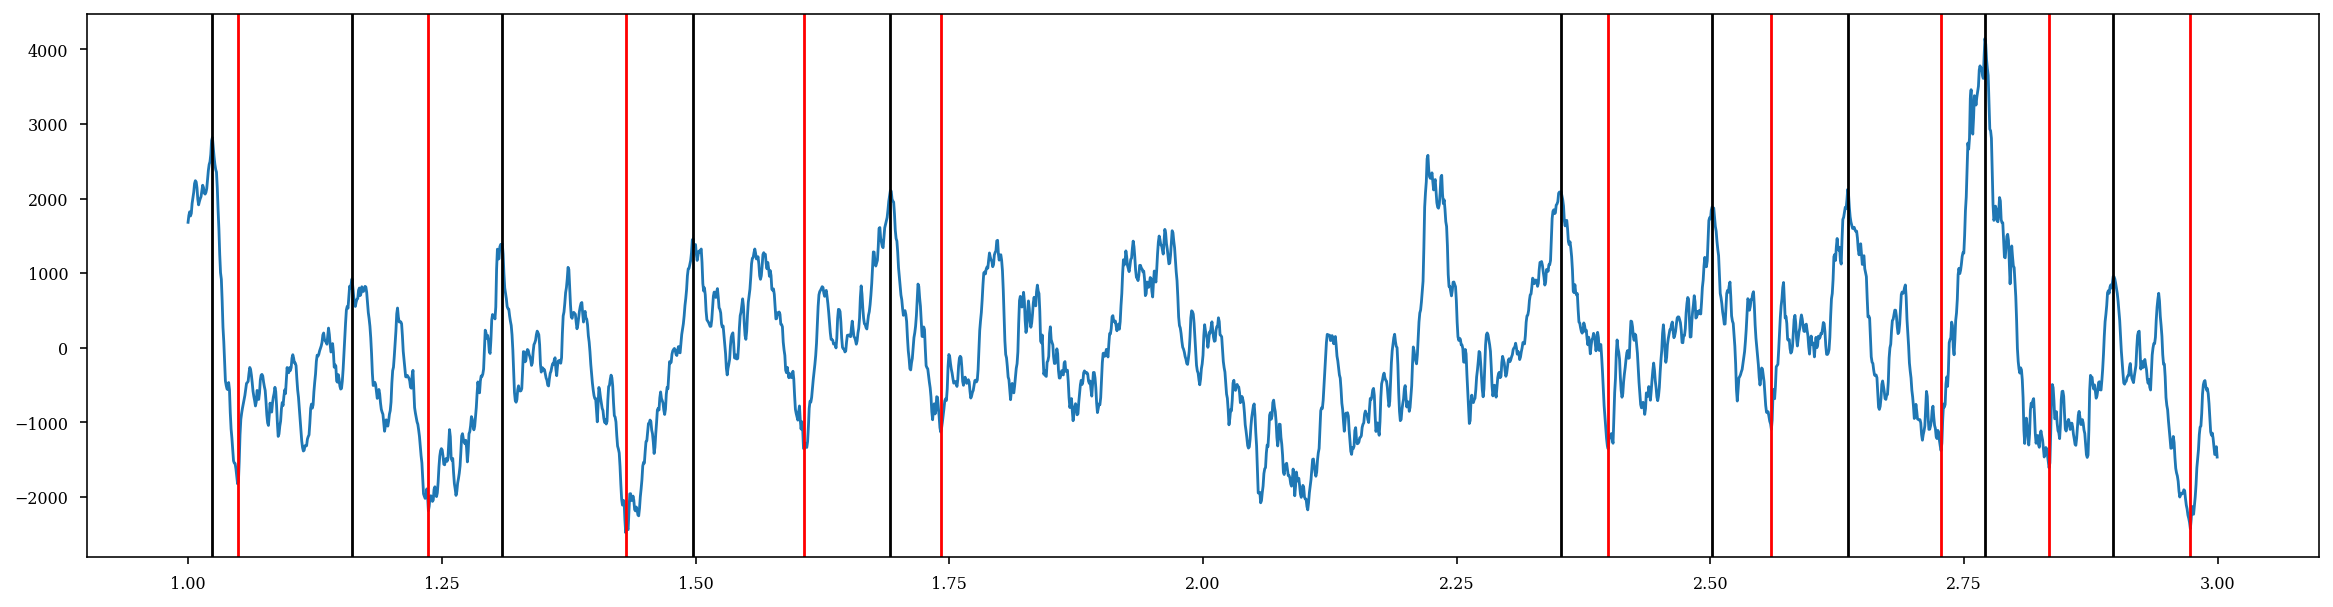

In [19]:
plt.figure(figsize=(20,5))
plotting_epoch = nel.EpochArray([1,3])
plt.plot(lfp.lfp[plotting_epoch].abscissa_vals, lfp.lfp[plotting_epoch].data[0])
# sample_peak	sample_last_zerox_decay	sample_zerox_decay	sample_zerox_rise	sample_last_trough	sample_next_trough
for temp_df in df_features.query("is_burst").itertuples():
    x = lfp.lfp.abscissa_vals[temp_df.sample_peak]
    if x < plotting_epoch.start:
        continue
    if x > plotting_epoch.stop:
        break
    plt.axvline(x,color="k")

    x = lfp.lfp.abscissa_vals[temp_df.sample_next_trough]
    plt.axvline(x,color="r")

    # plt.axvline(lfp.lfp[plotting_epoch].abscissa_vals[temp_df.sample_last_zerox_decay])
